#   Abdulaziz Nasser


#                        **House Price prediction**

#**Introduction**:

**In this project we will be addresing a house prices problem. The main issue to be addressed is how to predict a house price for regions based on multiple craiteria. This problem is faceing families , bussiness owners and real state agents. Based on the dataset a real agent collected over multiple regions , we are going to build a model which learn from this dataset and try to estimate the price of a given house.**

## **Dataset describtion**
**We are using a dataset that was collected by a real state agent. This dataset is a numerical dataset , all attributes are in float format .The size of the data is 5000 instences. It has five attributes each describes a feature that may affect a house price. there is no missing values (Null values) in the dataset. There is an attribute that we did not use in the training, since it does not have an affect on the target.This attribute was placed in the dataset so a user can understand the data set easly.**

**The dataset contains 7 columns and 5000 rows with CSV extension. The data contains the following columns :**

*   **Avg. Area Income** : Average income of the householder of the city house is located.
*   **Avg. Area House Age** : Averag age of houses in the same city.
*   **Avg. Area Number of Rooms** : Average number of rooms for houses in the same city.
*   **Avg. Area Number of Bedrooms** : Average number of bedrooms for houses in the same city
*   **Area Population** : Population of the city.
*   **Price** : Price that the house sold at.
*   **Address** : Address of the houses.

## **Importing needed libraries**

In [1]:
import pandas as pd # To read data from the file.
import numpy as np # To calculate the Root Mean Squared Error(RMSE).
import seaborn as sns # To making statistical graphics 
import matplotlib.pyplot as plt # To visualise result data.
from sklearn.model_selection import train_test_split # To split the data into train and test set.
from sklearn.linear_model import LinearRegression # To apply Linear Regression model on data set.
from sklearn import metrics # To calculate the metrics.
from sklearn.preprocessing import MinMaxScaler # To normalize data.

## **Importing Data and visualise it**

**As data is in the CSV file, we will read the CSV using pandas read_csv function.**

In [2]:
HouseDF = pd.read_csv('/content/USA_Housing.csv') # Imports Data set & store it in HouseDF.

 **We then checked the first five rows of the data frame using head()to give a clear examples of the dataset.**

In [3]:
HouseDF.head() # Prints the first five instences.

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**We printed the Data frame to give a better understanding of the dataset. We observe that there is seven columns , the datatype of six of them is Float and the last column datatype is an Object**

In [4]:
HouseDF.info() # Prints data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**We used the method (describe.) to show a detailed information about the datset. From our observation we belive that the data we are using is representative to the real word. that means the model we are building will perform well aganist any data given.**

In [5]:
HouseDF.describe() # Prints data describtion (describe data frame).

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
HouseDF.columns # Prints data columns.

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## **Exploratory Data Analysis for House Price Prediction**

**We will create some simple plot for visualizing the data.**

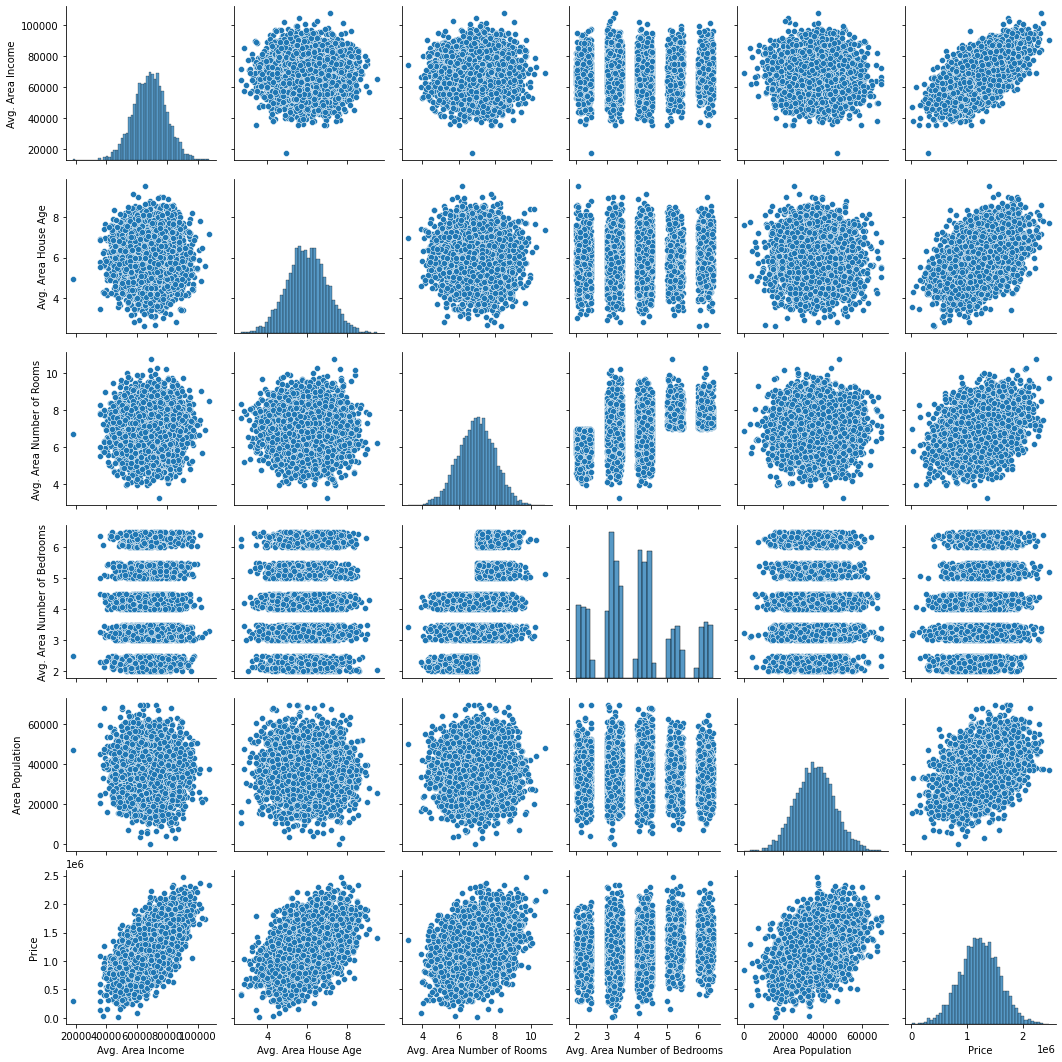

In [7]:
sns.pairplot(HouseDF) # Exploring the data set.

**Feature scaling is an important step to take prior to training of machine learning model to ensure that features are within the same scale,** 

**so that there are no features dominates the other features.**

**There are two types of feature scaling normalization and standardization.**


###**Normalization**

**We will use normalization which is conducted to make feature values range from 0 to 1.**

**x normalized = (x – x minimum) / (x maximum – x minimum)**

**First we define a new variable and point it to the necessary data.**

In [8]:
NorDF = HouseDF.drop('Address',axis = 1) # Get all data except Address attribute.
NorDF.columns # Print columns of normalized.

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

**Seconds define a new variable and assignment to MinMaxScaler object, then we use fit_transform method to normalize data.**

In [9]:
scaler = MinMaxScaler() # Storing the object MinMaxScaler to variable.
NorDF = scaler.fit_transform(NorDF) # Giveing data to fit_transform method to normalize data.

**After the normalization it convert it into anumpy array so we use pd.DataFrame to shift it back to a Pandas data frame.**

In [10]:
NorDF = pd.DataFrame(NorDF, columns=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population','Price']) # shift it back to a Pandas data frame.

**After normalaizing the dataset  the maximum should be 1 and the minimum should be 0, we are going to check If the data met the Normalaization standers by printing the describtion of the data frame by using describe() method.**

In [11]:
NorDF.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.564890,0.484803,0.498658,0.440296,0.518234,0.495748
std,0.118547,0.144216,0.133694,0.274253,0.142920,0.143946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.485889,0.389536,0.407138,0.253333,0.420903,0.400158
50%,0.567350,0.483815,0.500666,0.455556,0.518751,0.495992
75%,0.644977,0.582783,0.588787,0.553333,0.614676,0.593231
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**The figer below show the normalization on data**

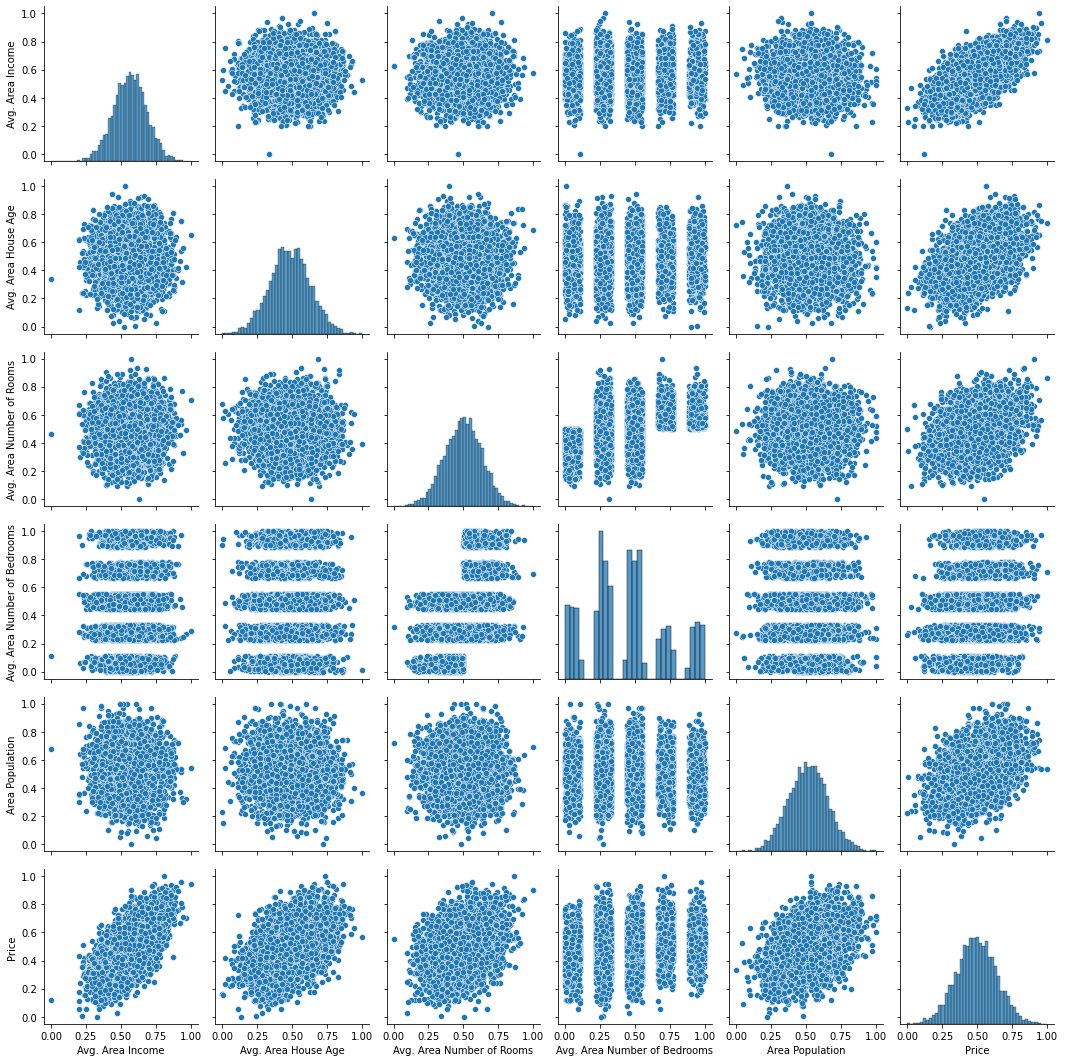

In [12]:
sns.pairplot(NorDF) # Exploring the data set.

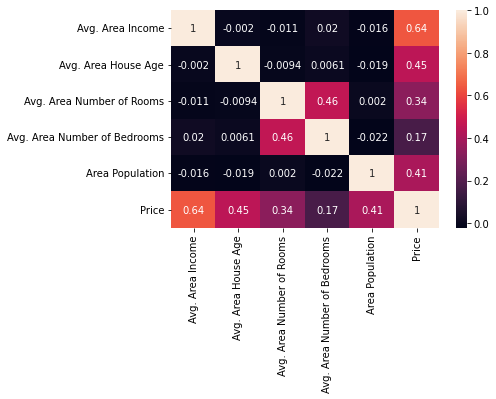

In [13]:
sns.heatmap(NorDF.corr(), annot=True) # Show the correlation of the data frame.

**The figuer above show the correlation between data, it also show a strong correlations between dependent variable (Price) and the independent variables.**
**So that give us a hint to use linear regression, Since it performe well if the correlation between the target and the other attributes are strong.**

## **Choosing a Machine Learning Model**
**After observing the dataset nature , the correlations and the target function datatype, we chose the Linear Reggresion model to train the data and estimating the target attribute. Since we have more than one independent variable that have an impact on changing the value of a dependent variable we must use a Multiple Linear Reggresion rather than Simple Linear Reggresion.**

## **Multiple Linear Reggresion**
**Multiple Linear Reggresion is a Reggresion model that estimates the relationship between two or more variables and a quantitative target variable. This model can allowe us to establish a precise understanding of the role of each attribute association and how much does it affect the real value of the target attribute.**

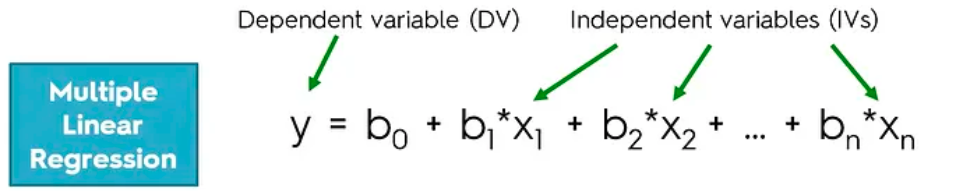

**The image above shows the Multiple Linear Regression equation. y: is the dependent variabal (the variable that we want to estimate) , b0: is y-intercebt ( the value of y when all Xi are zeros), Xi: is the independent variables  and bi: is their coefficients.**

## **How does MLR  works?**
**It simply evaluates the relative effect of the independent variables on the dependent variable when holding all the other variables in the model constant.**

## **Get data ready for training**

**To train out the regression model we will need to first split up our data into an X list that contains the features to train on, and a y list with the target variable, in this case, the "Price" column. We will ignore the Address column because it only has text which is not useful for linear regression modeling.**

In [14]:
X = NorDF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']] # Independent varibales.
y = NorDF['Price'] # Dependent varibales(target varibale).

### **Split Data into Train and Test**

**We will split our dataset into a training set and testing set using sklearn train_test_split(). the training set will be used for training the model and testing set for testing the model. We are creating a split of 80% of the data for training and 20% of the data for testing .**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) # Split data into train and test, with 20% for testing.

**X_train and y_train contain data for the training the model. X_test and y_test contain data for the testing model. X and y are features and target variable names.**

### **Creating and Training the Linear Regression Model**

**We will use LinearRegression object and passing the training data to fit() method so it trains the model based on the data given.**

In [16]:
lm = LinearRegression() # Storing the object linear regression model to variable.

In [17]:
lm.fit(X_train,y_train) # Trining the linear regression model on the train data.

LinearRegression()

## **Linear Regression Model Evaluation**

**After training the model we are now using score() method to test the performence of our model, we are passing the test data to get the models accuracy. The best accuracy we have got is 92% and it shows how well the model predicted the target values**

In [18]:
print("Accuracy of the linear regression model is: ",lm.score(X_test,y_test)) # To calculate and print the accuracy.

Accuracy of the linear regression model is:  0.921171916540202


**The intercept (or “constant”) in a regression model represents the mean value of the response variable when all of the predictor variables in the model are equal to zero. we are printing the y-intercept assuming that X is zero**

In [19]:
print("intercept = ",lm.intercept_) # To calculate and print the intercept.

intercept =  -0.5863736407513417


**Now we will evaluate the model by checking out its coefficients and how we can interpret them. each of the independent variables has an impact on the dependent variable, the coefficients shows that impact in a very clear manner.**

In [20]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient']) # To see the coefficient.
coeff_df

,Coefficient
Avg. Area Income,0.790402
Avg. Area House Age,0.463675
Avg. Area Number of Rooms,0.369556
Avg. Area Number of Bedrooms,0.003668
Area Population,0.434299


**What does coefficient of data says:**

*   Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of $0.790402** .

*   Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of $0.463675** .

*   Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of $0.369556** .

*   Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of $0.003668** .

*   Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of $0.434299** .

### **Predictions from our Linear Regression Model**

**Let’s find out the predictions of our test set and see how well it perform.**

In [21]:
predictions = lm.predict(X_test) # Predict the test set using the linear regression model.

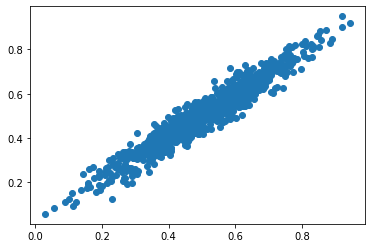

In [22]:
plt.scatter(y_test,predictions) # Plotting the predictions against the whitest(target variable).

**the scatter plot shows the performens of our trained model on the test dataset. we can observe that the data is in line shape, which means our model has done good predictions.**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


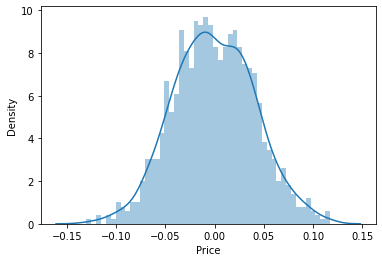

In [23]:
sns.distplot((y_test-predictions),bins=50);

**In the above histogram, we observe that the data is in bell shape (Normally Distributed), which means our model has done good predictions.**

In [24]:
'''income = input("Enter the Avg. area Income:")
age = input("Enter the Avg. Area house age:")
rooms = input("Enter Avg. Area Number of Rooms:")
bedroom = input("Enter Avg. Area Number of Bedrooms:")
poplution = input("Enter Area Population:")

NewIns = [[ income , age , rooms , bedroom , poplution]]
InsPredict = lm.predict(NewIns)
print("This is the prediction of the given instance: " , InsPredict)'''

'income = input("Enter the Avg. area Income:")\nage = input("Enter the Avg. Area house age:")\nrooms = input("Enter Avg. Area Number of Rooms:")\nbedroom = input("Enter Avg. Area Number of Bedrooms:")\npoplution = input("Enter Area Population:")\n\nNewIns = [[ income , age , rooms , bedroom , poplution]]\nInsPredict = lm.predict(NewIns)\nprint("This is the prediction of the given instance: " , InsPredict)'

### **Regression Evaluation Metrics**

**Here are three common evaluation metrics for regression problems:**

*   **Mean Absolute Error**(MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

*   **Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
*   **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Comparing these metrics:**

*   **MAE** is the easiest to understand because it’s the average error.

*   **MSE** is more popular than MAE because MSE “punishes” larger errors, which tends to be useful in the real world.
*   **RMSE** is even more popular than MSE because RMSE is interpretable in the “y” units.

**All of these are loss functions because we want to minimize them.**

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) # To calculate and print Mean Absolute Error(MAE).
print('MSE:', metrics.mean_squared_error(y_test, predictions)) # To calculate and print Mean Squared Error (MSE).
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) # To calculate and print Root Mean Squared Error(RMSE).

MAE: 0.03314350831151999
MSE: 0.0016783765736029346
RMSE: 0.0409679945030622


## **Conclusion**
**In our project, we built a machine learning model to estimate houes prices based on multiple features. The data we worked on was numirical dataset and the correlation between dependent and independant variables was strong. Based on our observation we chose Multiple Linear Regression model and we build it using Python. The results we conclude were good , after testing the model we managed to get up to 92% accurcy. We also performed MAE , MSE and RMSE metrics on the model and the loss of value of the model were calculated.**

## **Reference**

**Tom M. Mitchell. Machine Learning, McGraw Hill Inter. Editions, 1997.**

https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

https://medium.com/@manjabogicevic/multiple-linear-regression-using-python-b99754591ac0

**Dataset:**https://colab.research.google.com/drive/1jkZulW7tUAknaQA4dyydNz1eTqt10_9j?usp=sharing